# ਪੀਟਰ ਅਤੇ ਭੇੜੀਆ: ਹਕੀਕਤੀ ਵਾਤਾਵਰਣ

ਸਾਡੇ ਹਾਲਾਤ ਵਿੱਚ, ਪੀਟਰ ਬਿਨਾ ਥੱਕੇ ਜਾਂ ਭੁੱਖੇ ਹੋਏ ਲਗਭਗ ਆਸਾਨੀ ਨਾਲ ਘੁੰਮ ਸਕਦਾ ਸੀ। ਇੱਕ ਜ਼ਿਆਦਾ ਹਕੀਕਤੀ ਦੁਨੀਆ ਵਿੱਚ, ਉਸਨੂੰ ਵਾਰ-ਵਾਰ ਬੈਠ ਕੇ ਅਰਾਮ ਕਰਨਾ ਪੈਂਦਾ ਹੈ ਅਤੇ ਆਪਣੇ ਆਪ ਨੂੰ ਖਾਣਾ ਖਵਾਉਣਾ ਪੈਂਦਾ ਹੈ। ਆਓ ਆਪਣੀ ਦੁਨੀਆ ਨੂੰ ਹੋਰ ਹਕੀਕਤੀ ਬਣਾਈਏ, ਹੇਠਾਂ ਦਿੱਤੇ ਨਿਯਮਾਂ ਲਾਗੂ ਕਰਕੇ:

1. ਇੱਕ ਜਗ੍ਹਾ ਤੋਂ ਦੂਜੀ ਜਗ੍ਹਾ ਜਾਣ ਨਾਲ, ਪੀਟਰ ਦੀ **energy** ਘਟਦੀ ਹੈ ਅਤੇ ਕੁਝ **fatigue** ਵਧਦੀ ਹੈ।
2. ਪੀਟਰ ਸੇਬ ਖਾ ਕੇ ਹੋਰ energy ਪ੍ਰਾਪਤ ਕਰ ਸਕਦਾ ਹੈ।
3. ਪੀਟਰ ਝਾੜੀ ਦੇ ਹੇਠਾਂ ਜਾਂ ਘਾਹ 'ਤੇ ਅਰਾਮ ਕਰਕੇ fatigue ਨੂੰ ਘਟਾ ਸਕਦਾ ਹੈ (ਜਾਂਕਿ ਉਹ ਝਾੜੀ ਜਾਂ ਘਾਹ ਵਾਲੇ ਹਰੇ ਖੇਤਰ ਵਿੱਚ ਚਲ ਕੇ ਜਾਂਦਾ ਹੈ)।
4. ਪੀਟਰ ਨੂੰ ਭੇੜੀਆ ਲੱਭ ਕੇ ਮਾਰਨਾ ਹੈ।
5. ਭੇੜੀਆ ਨੂੰ ਮਾਰਨ ਲਈ, ਪੀਟਰ ਦੇ energy ਅਤੇ fatigue ਦੇ ਕੁਝ ਨਿਰਧਾਰਿਤ ਪੱਧਰ ਹੋਣੇ ਚਾਹੀਦੇ ਹਨ, ਨਹੀਂ ਤਾਂ ਉਹ ਜੰਗ ਹਾਰ ਜਾਵੇਗਾ।


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from rlboard import *

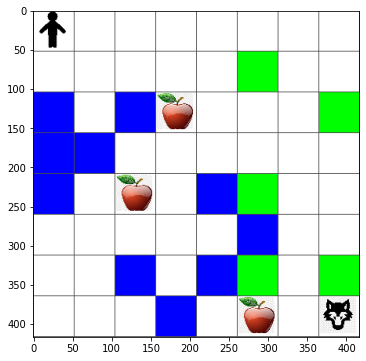

In [2]:
width, height = 8,8
m = Board(width,height)
m.randomize(seed=13)
m.plot()

In [3]:
actions = { "U" : (0,-1), "D" : (0,1), "L" : (-1,0), "R" : (1,0) }
action_idx = { a : i for i,a in enumerate(actions.keys()) }

## ਸਟੇਟ ਨੂੰ ਪਰਿਭਾਸ਼ਿਤ ਕਰਨਾ

ਸਾਡੇ ਨਵੇਂ ਖੇਡ ਦੇ ਨਿਯਮਾਂ ਵਿੱਚ, ਸਾਨੂੰ ਹਰ ਬੋਰਡ ਸਟੇਟ 'ਤੇ ਊਰਜਾ ਅਤੇ ਥਕਾਵਟ ਦਾ ਹਿਸਾਬ ਰੱਖਣਾ ਪਵੇਗਾ। ਇਸ ਲਈ ਅਸੀਂ ਇੱਕ ਆਬਜੈਕਟ `state` ਬਣਾਵਾਂਗੇ ਜੋ ਮੌਜੂਦਾ ਸਮੱਸਿਆ ਦੀ ਸਥਿਤੀ ਬਾਰੇ ਸਾਰੀ ਲੋੜੀਂਦੀ ਜਾਣਕਾਰੀ ਰੱਖੇਗਾ, ਜਿਸ ਵਿੱਚ ਬੋਰਡ ਦੀ ਸਥਿਤੀ, ਊਰਜਾ ਅਤੇ ਥਕਾਵਟ ਦੇ ਮੌਜੂਦਾ ਪੱਧਰ, ਅਤੇ ਇਹ ਵੀ ਕਿ ਅਸੀਂ ਟਰਮੀਨਲ ਸਟੇਟ 'ਤੇ ਭੇੜੇ ਨੂੰ ਹਰਾ ਸਕਦੇ ਹਾਂ ਜਾਂ ਨਹੀਂ, ਸ਼ਾਮਲ ਹੋਵੇਗਾ:


In [4]:
class state:
    def __init__(self,board,energy=10,fatigue=0,init=True):
        self.board = board
        self.energy = energy
        self.fatigue = fatigue
        self.dead = False
        if init:
            self.board.random_start()
        self.update()

    def at(self):
        return self.board.at()

    def update(self):
        if self.at() == Board.Cell.water:
            self.dead = True
            return
        if self.at() == Board.Cell.tree:
            self.fatigue = 0
        if self.at() == Board.Cell.apple:
            self.energy = 10

    def move(self,a):
        self.board.move(a)
        self.energy -= 1
        self.fatigue += 1
        self.update()

    def is_winning(self):
        return self.energy > self.fatigue

ਚਲੋ ਸਮੱਸਿਆ ਨੂੰ ਰੈਂਡਮ ਵਾਕ ਦੇ ਜ਼ਰੀਏ ਹੱਲ ਕਰਨ ਦੀ ਕੋਸ਼ਿਸ਼ ਕਰਦੇ ਹਾਂ ਅਤੇ ਵੇਖਦੇ ਹਾਂ ਕਿ ਅਸੀਂ ਸਫਲ ਹੁੰਦੇ ਹਾਂ:


In [5]:
def random_policy(state):
    return random.choice(list(actions))

def walk(board,policy):
    n = 0 # number of steps
    s = state(board)
    while True:
        if s.at() == Board.Cell.wolf:
            if s.is_winning():
                return n # success!
            else:
                return -n # failure!
        if s.at() == Board.Cell.water:
            return 0 # died
        a = actions[policy(m)]
        s.move(a)
        n+=1

walk(m,random_policy)

0

In [6]:
def print_statistics(policy):
    s,w,n = 0,0,0
    for _ in range(100):
        z = walk(m,policy)
        if z<0:
            w+=1
        elif z==0:
            n+=1
        else:
            s+=1
    print(f"Killed by wolf = {w}, won: {s} times, drown: {n} times")

print_statistics(random_policy)

Killed by wolf = 5, won: 1 times, drown: 94 times


## ਇਨਾਮ ਫੰਕਸ਼ਨ

### ਝਲਕ
ਇਨਾਮ ਫੰਕਸ਼ਨ ਉਹ ਕੋਡ ਹੈ ਜੋ ਸਿਖਲਾਈ ਦੇ ਦੌਰਾਨ ਏਜੰਟ ਦੇ ਵਿਵਹਾਰ ਨੂੰ ਮਾਪਦਾ ਹੈ। ਇਹ ਫੰਕਸ਼ਨ ਏਜੰਟ ਨੂੰ ਸਿਖਾਉਣ ਵਿੱਚ ਮਦਦ ਕਰਦਾ ਹੈ ਕਿ ਕਿਵੇਂ ਵਾਂਛਿਤ ਲਕਸ਼ਾਂ ਨੂੰ ਹਾਸਲ ਕਰਨਾ ਹੈ। ਸਹੀ ਤਰੀਕੇ ਨਾਲ ਡਿਜ਼ਾਈਨ ਕੀਤਾ ਗਿਆ ਇਨਾਮ ਫੰਕਸ਼ਨ ਸਿਖਲਾਈ ਦੀ ਗਤੀ ਅਤੇ ਗੁਣਵੱਤਾ ਵਿੱਚ ਮਹੱਤਵਪੂਰਨ ਭੂਮਿਕਾ ਨਿਭਾਉਂਦਾ ਹੈ।

### ਇਨਾਮ ਫੰਕਸ਼ਨ ਬਣਾਉਣ ਦੇ ਨਿਯਮ
ਇਨਾਮ ਫੰਕਸ਼ਨ ਬਣਾਉਣ ਸਮੇਂ ਹੇਠਾਂ ਦਿੱਤੇ ਨਿਯਮਾਂ ਨੂੰ ਧਿਆਨ ਵਿੱਚ ਰੱਖੋ:

1. **ਸਪਸ਼ਟਤਾ**: ਇਨਾਮ ਫੰਕਸ਼ਨ ਸਪਸ਼ਟ ਅਤੇ ਸਧਾਰਨ ਹੋਣਾ ਚਾਹੀਦਾ ਹੈ। ਜਟਿਲਤਾ ਤੋਂ ਬਚੋ, ਕਿਉਂਕਿ ਇਹ ਸਿਖਲਾਈ ਦੇ ਸਮੇਂ ਨੂੰ ਵਧਾ ਸਕਦਾ ਹੈ।
2. **ਸਮਰਥਨ**: ਇਨਾਮ ਫੰਕਸ਼ਨ ਨੂੰ ਏਜੰਟ ਦੇ ਲਕਸ਼ਾਂ ਨੂੰ ਸਮਰਥਨ ਕਰਨਾ ਚਾਹੀਦਾ ਹੈ। ਇਹ ਯਕੀਨੀ ਬਣਾਓ ਕਿ ਇਨਾਮ ਸਿਸਟਮ ਸਹੀ ਵਿਵਹਾਰ ਨੂੰ ਉਤਸ਼ਾਹਿਤ ਕਰਦਾ ਹੈ।
3. **ਸੰਤੁਲਨ**: ਇਨਾਮਾਂ ਨੂੰ ਸੰਤੁਲਿਤ ਰੱਖੋ। ਬਹੁਤ ਵੱਡੇ ਜਾਂ ਬਹੁਤ ਛੋਟੇ ਇਨਾਮ ਸਿਖਲਾਈ ਦੇ ਨਤੀਜਿਆਂ ਨੂੰ ਪ੍ਰਭਾਵਿਤ ਕਰ ਸਕਦੇ ਹਨ।
4. **ਨਕਾਰਾਤਮਕ ਇਨਾਮ**: ਜੇਕਰ ਜ਼ਰੂਰੀ ਹੋਵੇ, ਨਕਾਰਾਤਮਕ ਇਨਾਮਾਂ ਦੀ ਵਰਤੋਂ ਕਰੋ ਤਾਂ ਜੋ ਏਜੰਟ ਨੂੰ ਅਣਚਾਹੇ ਵਿਵਹਾਰ ਤੋਂ ਰੋਕਿਆ ਜਾ ਸਕੇ।

### ਉਦਾਹਰਣ
ਹੇਠਾਂ ਇੱਕ ਸਧਾਰਨ ਇਨਾਮ ਫੰਕਸ਼ਨ ਦਾ ਉਦਾਹਰਣ ਦਿੱਤਾ ਗਿਆ ਹੈ:

```python
def reward_function(params):
    # ਏਜੰਟ ਦੀ ਮੌਜੂਦਾ ਸਥਿਤੀ ਪ੍ਰਾਪਤ ਕਰੋ
    distance_from_center = params['distance_from_center']
    track_width = params['track_width']
    
    # ਟਰੈਕ ਦੇ ਕੇਂਦਰ ਦੇ ਨੇੜੇ ਹੋਣ ਲਈ ਇਨਾਮ ਦੀ ਗਣਨਾ ਕਰੋ
    if distance_from_center < track_width * 0.1:
        reward = 1.0  # ਉੱਚ ਇਨਾਮ
    else:
        reward = 0.1  # ਘੱਟ ਇਨਾਮ
    
    return reward
```

### ਆਮ ਗਲਤੀਆਂ
ਇਨਾਮ ਫੰਕਸ਼ਨ ਬਣਾਉਣ ਸਮੇਂ ਹੇਠਾਂ ਦਿੱਤੀਆਂ ਗਲਤੀਆਂ ਤੋਂ ਬਚੋ:

- **ਅਸਪਸ਼ਟ ਇਨਾਮ**: ਜੇ ਇਨਾਮ ਸਿਸਟਮ ਸਪਸ਼ਟ ਨਹੀਂ ਹੈ, ਤਾਂ ਏਜੰਟ ਗਲਤ ਵਿਵਹਾਰ ਸਿੱਖ ਸਕਦਾ ਹੈ।
- **ਅਤਿ-ਜਟਿਲਤਾ**: ਜਟਿਲ ਇਨਾਮ ਫੰਕਸ਼ਨ ਸਿਖਲਾਈ ਦੇ ਸਮੇਂ ਨੂੰ ਵਧਾ ਸਕਦਾ ਹੈ।
- **ਅਣਸੰਤੁਲਨ ਇਨਾਮ**: ਬਹੁਤ ਵੱਡੇ ਇਨਾਮਾਂ ਨਾਲ ਏਜੰਟ ਅਣਚਾਹੇ ਵਿਵਹਾਰ ਨੂੰ ਵਧਾ ਸਕਦਾ ਹੈ।

### ਸਾਰ
ਇਨਾਮ ਫੰਕਸ਼ਨ ਡਿਜ਼ਾਈਨ ਕਰਨਾ ਸਿਖਲਾਈ ਦੇ ਪ੍ਰਕਿਰਿਆ ਦਾ ਇੱਕ ਮਹੱਤਵਪੂਰਨ ਹਿੱਸਾ ਹੈ। ਸਪਸ਼ਟ, ਸੰਤੁਲਿਤ ਅਤੇ ਲਕਸ਼-ਕੇਂਦਰਿਤ ਇਨਾਮ ਫੰਕਸ਼ਨ ਸਿਖਲਾਈ ਦੇ ਨਤੀਜਿਆਂ ਨੂੰ ਬਹੁਤ ਬਿਹਤਰ ਬਣਾ ਸਕਦਾ ਹੈ।


In [7]:
def reward(s):
    r = s.energy-s.fatigue
    if s.at()==Board.Cell.wolf:
        return 100 if s.is_winning() else -100
    if s.at()==Board.Cell.water:
        return -100
    return r

## ਕਿਊ-ਲਰਨਿੰਗ ਐਲਗੋਰਿਥਮ

ਅਸਲ ਲਰਨਿੰਗ ਐਲਗੋਰਿਥਮ ਲਗਭਗ ਬਦਲਦਾ ਨਹੀਂ ਹੈ, ਅਸੀਂ ਸਿਰਫ `state` ਦੀ ਵਰਤੋਂ ਕਰਦੇ ਹਾਂ ਬਜਾਏ ਸਿਰਫ ਬੋਰਡ ਪੋਜ਼ੀਸ਼ਨ।


In [8]:
Q = np.ones((width,height,len(actions)),dtype=np.float)*1.0/len(actions)

In [9]:
def probs(v,eps=1e-4):
    v = v-v.min()+eps
    v = v/v.sum()
    return v

In [10]:

from IPython.display import clear_output

lpath = []

for epoch in range(10000):
    clear_output(wait=True)
    print(f"Epoch = {epoch}",end='')

    # Pick initial point
    s = state(m)
    
    # Start travelling
    n=0
    cum_reward = 0
    while True:
        x,y = s.board.human
        v = probs(Q[x,y])
        while True:
            a = random.choices(list(actions),weights=v)[0]
            dpos = actions[a]
            if s.board.is_valid(s.board.move_pos(s.board.human,dpos)):
                break 
        s.move(dpos)
        r = reward(s)
        if abs(r)==100: # end of game
            print(f" {n} steps",end='\r')
            lpath.append(n)
            break
        alpha = np.exp(-n / 3000)
        gamma = 0.5
        ai = action_idx[a]
        Q[x,y,ai] = (1 - alpha) * Q[x,y,ai] + alpha * (r + gamma * Q[x+dpos[0], y+dpos[1]].max())
        n+=1

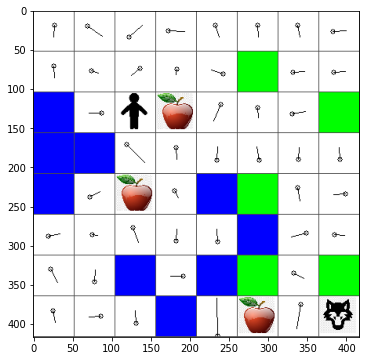

In [11]:
m.plot(Q)

## ਨਤੀਜੇ

ਆਓ ਵੇਖੀਏ ਕਿ ਅਸੀਂ ਪੀਟਰ ਨੂੰ ਭੇੜੀਆ ਨਾਲ ਲੜਨ ਲਈ ਸਫਲਤਾਪੂਰਵਕ ਤਿਆਰ ਕੀਤਾ ਹੈ!


In [12]:
def qpolicy(m):
        x,y = m.human
        v = probs(Q[x,y])
        a = random.choices(list(actions),weights=v)[0]
        return a

print_statistics(qpolicy)

Killed by wolf = 1, won: 9 times, drown: 90 times


ਅਸੀਂ ਹੁਣ ਡੁੱਬਣ ਦੇ ਮਾਮਲੇ ਬਹੁਤ ਘੱਟ ਦੇਖਦੇ ਹਾਂ, ਪਰ ਪੀਟਰ ਹਜੇ ਵੀ ਹਮੇਸ਼ਾ ਭੇੜੀਆ ਨੂੰ ਮਾਰਣ ਵਿੱਚ ਸਮਰੱਥ ਨਹੀਂ ਹੈ। ਹਾਈਪਰਪੈਰਾਮੀਟਰਾਂ ਨਾਲ ਖੇਡ ਕੇ ਇਸ ਨਤੀਜੇ ਨੂੰ ਸੁਧਾਰਨ ਦੀ ਕੋਸ਼ਿਸ਼ ਕਰੋ।


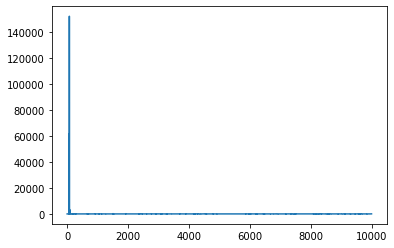

In [13]:
plt.plot(lpath)


---

**ਅਸਵੀਕਤੀ**:  
ਇਹ ਦਸਤਾਵੇਜ਼ ਨੂੰ AI ਅਨੁਵਾਦ ਸੇਵਾ [Co-op Translator](https://github.com/Azure/co-op-translator) ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਅਨੁਵਾਦ ਕੀਤਾ ਗਿਆ ਹੈ। ਜਦੋਂ ਕਿ ਅਸੀਂ ਸਹੀਤਾ ਲਈ ਯਤਨਸ਼ੀਲ ਹਾਂ, ਕਿਰਪਾ ਕਰਕੇ ਧਿਆਨ ਦਿਓ ਕਿ ਸਵੈਚਾਲਿਤ ਅਨੁਵਾਦਾਂ ਵਿੱਚ ਗਲਤੀਆਂ ਜਾਂ ਅਸੁਚੀਤਤਾਵਾਂ ਹੋ ਸਕਦੀਆਂ ਹਨ। ਇਸ ਦੀ ਮੂਲ ਭਾਸ਼ਾ ਵਿੱਚ ਮੌਜੂਦ ਅਸਲ ਦਸਤਾਵੇਜ਼ ਨੂੰ ਅਧਿਕਾਰਤ ਸਰੋਤ ਮੰਨਿਆ ਜਾਣਾ ਚਾਹੀਦਾ ਹੈ। ਮਹੱਤਵਪੂਰਨ ਜਾਣਕਾਰੀ ਲਈ, ਪੇਸ਼ੇਵਰ ਮਨੁੱਖੀ ਅਨੁਵਾਦ ਦੀ ਸਿਫਾਰਸ਼ ਕੀਤੀ ਜਾਂਦੀ ਹੈ। ਇਸ ਅਨੁਵਾਦ ਦੀ ਵਰਤੋਂ ਤੋਂ ਪੈਦਾ ਹੋਣ ਵਾਲੇ ਕਿਸੇ ਵੀ ਗਲਤਫਹਿਮੀ ਜਾਂ ਗਲਤ ਵਿਆਖਿਆ ਲਈ ਅਸੀਂ ਜ਼ਿੰਮੇਵਾਰ ਨਹੀਂ ਹਾਂ।
